In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set(font_scale=1.5)
%matplotlib inline

**Формулировка задачи на простом языке:** 
> Выяснить, в какое время дня совершается наибольшее количество поездок.
    
**Формулировка задачи на математическом языке**
> Исходя из данных о поездках, выяснить, в какое время дня и во сколько именно совершается наибольшее число пеоздок.

In [2]:
DATA_DIR = "../data/processed/"

In [12]:
trips = pd.read_csv(DATA_DIR+"trips.csv", 
                    error_bad_lines=False,
                    index_col=0)
trips.head(3)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0


In [13]:
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['stoptime'] = pd.to_datetime(trips['stoptime'])

In [5]:
def get_time_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [18]:
trips['starttime_of_day'] = [get_time_of_day(hour) for hour in trips['starttime'].dt.hour]

Посмотрим на гистограмму поездок по времени суток за всю историю наблюдений.

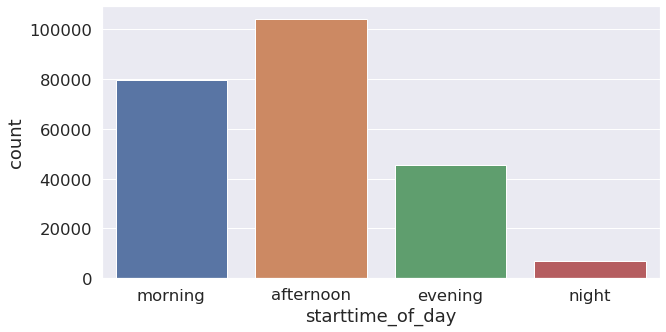

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='starttime_of_day', data=trips)
plt.show()

Как видим, велосипедами пользуются преимущественно утром и днем.

In [28]:
trips['starttime_of_day_hour'] = [hour for hour in trips['starttime'].dt.hour]

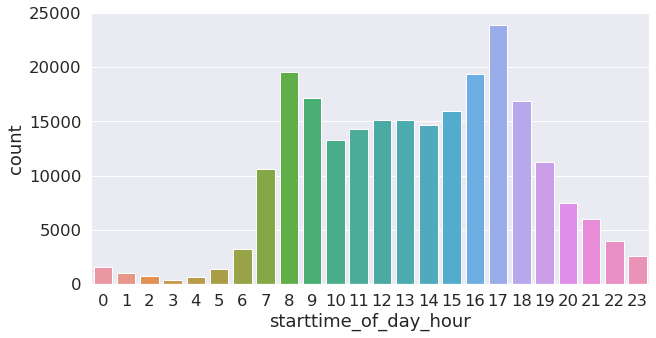

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='starttime_of_day_hour', data=trips)
plt.show()

Видим, что пик поезок приходится на `8` утра и `17` дня - приблизительно время и начало рабочего дня, что вообще говоря объяснимо. При этом в течение дня так же активно пользуют велопрокатом.